# Load the module and the needed data for the demonstration

<pre> 
Guillermo Perez-Hernandez  guille.perez@fu-berlin.de 
</pre>
   
In this notebook we will be using the 1 millisecond trajectory of Bovine Pancreatic Trypsin Inhibitor (BPTI) generated by DE Shaw Research on the Anton Supercomputer. The original work is 
 * Shaw DE, Maragakis P, Lindorff-Larsen K, Piana S, Dror RO, Eastwood MP, Bank JA, Jumper JM, Salmon JK, Shan Y, Wriggers W: Atomic-level characterization of the structural dynamics of proteins. Science 330:341-346 (2010).  doi: 10.1126/science.1187409.

In [7]:
import projX
%matplotlib notebook

In [8]:
MD_trajfiles = ['data/c-alpha_centered.stride.100.xtc',
             'data/c-alpha_centered.stride.100.reversed.xtc' #fake file to have a list of files
             ]
top = 'data/bpti-c-alpha_centered.pdb'

In [9]:
# Skip TICA if you already have an Y.npy file
try:    
    import numpy as np
    Y = [np.load('data/Y.%u.npy'%ii) for ii, __ in enumerate(MD_trajfiles)]
except:
    import pyemma
    feat = pyemma.coordinates.featurizer(top)
    pairs = feat.pairs(range(feat.topology.n_atoms)[::2])
    feat.add_distances(pairs)
    src  = pyemma.coordinates.source(MD_trajfiles, features=feat)
    tica = pyemma.coordinates.tica(src, lag=100, dim=3)
    Y = tica.get_output()    
    [np.save('data/Y.%u.npy'%ii, iY) for ii, iY in enumerate(Y)]

# Visualize a FES and the molecular structures "behind" it
Execute the following cell and click either on the FES or on the slidebar

<IPython.core.display.Javascript object>


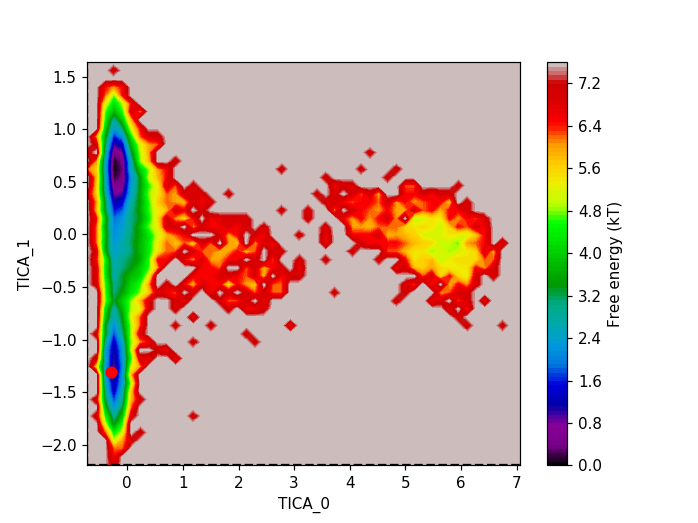

/home/mi/gph82/miniconda3/lib/python3.4/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [10]:
ax, fig, iwd, data_sample, geom = projX.visualize.FES(MD_trajfiles, top, 
                                                      #'data/Y.0.npy', 'data/Y.1.npy'], 
                                                      Y, 
                                                      nbins=50, 
                                                      xlabel='TICA_0', ylabel='TICA_1'
                                          )
iwd


# Do "trajectory-sampling" of a given FES
This can be more time consuming and prettly slow, but is a proof of function. The user can sample structures as they occurr in sequence in the actual trajectory

In [12]:
# Not plot_FES=True is not availble RN
__, __, iwd, __ = projX.visualize.traj(MD_trajfiles, top, 
                                        ['data/Y.0.npy', 'data/Y.1.npy'],  
                                       #ref_traj = 1,
                                        #plot_FES = True,
                                        max_frames=2000
                          )
iwd


<IPython.core.display.Javascript object>

0 (2063, 2)
1 (2063, 2)


# Intermediate steps: use projX to generate a regspace sample of the data

In [13]:
data_sample, geoms = projX.generate.sample(MD_trajfiles, top, Y, 
                                      n_points=200
                                      #keep_all_samples=True,                                      
                                      #n_geom_samples=200,
                                      #verbose=True
                                    )
data_sample.shape, geoms

02-03-17 16:54:26 pyemma.coordinates.clustering.regspace.RegularSpaceClustering[2] WARNING  Maximum number of cluster centers reached. Consider increasing max_centers or choose a larger minimum distance, dmin.
02-03-17 16:54:26 pyemma.coordinates.clustering.regspace.RegularSpaceClustering[2] INFO     Presumably finished estimation. Message: Used data for centers: 42.42%


/home/mi/gph82/programs/PyEmma/pyemma/coordinates/clustering/regspace.py:151: UserWarning: Maximum number of cluster centers reached. Consider increasing max_centers or choose a larger minimum distance, dmin.
  warnings.warn(msg)


((191, 2),
 <mdtraj.Trajectory with 191 frames, 58 atoms, 58 residues, and unitcells at 0x7f4d0d3ec208>)

# Link the PDF plot with the sampled structures and visually explore the FES 
Click either on the plot or on the widget slidebar: they're connected! 

In [14]:
# Replot the FES
from matplotlib import pylab as plt
plt.figure(figsize=(7,7))
h, (x,y) = np.histogramdd(np.vstack(Y)[:,:2], bins=50)
plt.contourf(x[:-1], y[:-1], -np.log(h.T), alpha=.50)
# Create the linked widget
linked_wdg = projX.visualize.sample(data_sample, 
                              geoms.superpose(geoms[0]),                             
                              plt.gca(), 
                              clear_lines=True,
                              #plot_path=True
                            )
plt.plot(data_sample[:,0], data_sample[:,1],' ok', zorder=0)
# Show it
linked_wdg

<IPython.core.display.Javascript object>

/home/mi/gph82/miniconda3/lib/python3.4/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log


# Instead of sampling the full space, use projX to generate paths along the different projections/axis

In [15]:
paths_dict, idata = projX.generate.projection_paths(MD_trajfiles, top, 
                                         ['data/Y.0.npy', 'data/Y.1.npy'],
                                         #Y, # You can also directly give the data here
                                         n_projs=2,
                                         proj_dim = 3, 
                                         verbose=False, 
                                        )

# Link the PDF plot with the sampled paths/structures and visually explore the coordinates (separately). 
Click either on the plot or on the widget slidebar: they're connected! You can change the type of path between min_rmsd or min_disp and you can also change the coordinate sampled (0 or 1)


In [16]:
# Choose the coordinate and the tyep of path
coord = 0
#path_type = 'min_rmsd'
path_type = 'min_disp'
igeom = paths_dict[coord][path_type]["geom"]
ipath = paths_dict[coord][path_type]["proj"]

In [17]:
plt.figure(figsize=(7,7))
h, (x,y) = np.histogramdd(np.vstack(Y)[:,:2], bins=50)
plt.contourf(x[:-1], y[:-1], -np.log(h.T), alpha=.50)

linked_wdg = projX.visualize.sample(ipath[:,:2], 
                              igeom.superpose(igeom[0]),                             
                              plt.gca(), 
                              clear_lines=True,
                              plot_path=True
                            )
linked_wdg

<IPython.core.display.Javascript object>

/home/mi/gph82/miniconda3/lib/python3.4/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


# You can even provide your own ```PyEMMA``` clustering object...

In [18]:
import pyemma
clkmeans = pyemma.coordinates.cluster_kmeans([iY[:,:2] for iY in Y], 5)

02-03-17 16:54:45 pyemma.coordinates.clustering.kmeans.KmeansClustering[6] INFO     Algorithm did not reach convergence criterion of 1e-05 in 10 iterations. Consider increasing max_iter.


In [19]:
data_sample, geoms = projX.generate.sample(MD_trajfiles, top, clkmeans, 
                                     n_geom_samples=50, 
                                     #keep_all_samples=True # read the doc for this argument
                                    )

In [20]:
plt.figure(figsize=(7,7))
plt.contourf(x[:-1], y[:-1], -np.log(h.T), alpha=.50)
plt.plot(clkmeans.clustercenters[:,0], clkmeans.clustercenters[:,1],' ok')


iwdg = projX.visualize.sample(data_sample, 
                              geoms.superpose(geoms[0]),                             
                              plt.gca(), 
                              clear_lines=False,
                              #plot_path=True
                            )
iwdg

<IPython.core.display.Javascript object>

/home/mi/gph82/miniconda3/lib/python3.4/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


# Visual Representations for MSMs
Visually inspect the network

In [21]:
MSM = pyemma.msm.estimate_markov_model(clkmeans.dtrajs, 20)

In [22]:
plt.figure(figsize=(7,7))

ax, pos  = pyemma.plots.plot_markov_model(MSM.P, 
                                          minflux=5e-4, 
                                          arrow_labels=None,
                                          ax=plt.gca(), 
                                          arrow_curvature = 2, show_frame=True,
                                          pos=clkmeans.clustercenters)
# Add a background if wanted
h, (x, y) = np.histogramdd(np.vstack(Y)[:,:2], weights=np.hstack(MSM.trajectory_weights()),  bins=50)
plt.contourf(x[:-1], y[:-1], -np.log(h.T), cmap="jet", alpha=.5, zorder=0)
plt.xlim(x[[0,-1]])
plt.xticks(np.unique(x.round()))
plt.yticks(np.unique(y.round()))

plt.ylim(y[[0,-1]])

iwd = projX.visualize.sample(pos, geoms, plt.gca())
iwd

<IPython.core.display.Javascript object>

/home/mi/gph82/miniconda3/lib/python3.4/site-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in log


In [23]:
# Check
# https://github.com/arose/nglview/issues/518
# https://github.com/arose/nglview/issues/517

# TPT Pathway representation

In [24]:
# Do an MSM with a realistic number of clustercenters
cl_many = pyemma.coordinates.cluster_regspace(Y, dmin=.25)
M = pyemma.msm.estimate_markov_model(cl_many.dtrajs, 20)
cl_many.n_clusters

733

In [25]:
# Use this object to sample geometries
pos, geom = projX.generate.sample(MD_trajfiles, top, cl_many)

In [26]:
# Find the most representative microstate of each 
# and least populated macrostate
M.pcca(3)
dens_max_i = [distro.argmax() for distro in M.metastable_distributions]
A = np.argmax([M.stationary_distribution[iset].sum() for iset in M.metastable_sets])
B = np.argmin([M.stationary_distribution[iset].sum() for iset in M.metastable_sets])
print(cl_many.clustercenters[dens_max_i[A]],
      cl_many.clustercenters[dens_max_i[B]])

[-0.14320731  0.47983471 -0.30337098] [ 5.81006289 -0.196033   -0.23657499]


In [27]:
# Create a TPT object with most_pop, least_pop as source, sink respectively
tpt = pyemma.msm.tpt(M, [dens_max_i[A]], [dens_max_i[B]])
paths, flux = tpt.pathways(fraction=.5)

In [28]:
# Get a path with a decent number of intermediates
sample_path = paths[np.argmax([len(ipath) for ipath in paths])]

In [30]:
# Still experimental
plt.figure()
plt.contourf(x[:-1], y[:-1], -np.log(h.T), cmap="jet", alpha=.5, zorder=0)
projX.visualize.sample(cl_many.clustercenters[sample_path], 
                       geom[sample_path].superpose(geom[sample_path[0]]), plt.gca(), 
                       plot_path=True,
                      )
plt.scatter(*cl_many.clustercenters.T, alpha=.25)

<IPython.core.display.Javascript object>

/home/mi/gph82/miniconda3/lib/python3.4/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


ValueError: too many values to unpack (expected 2)